In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
import datetime
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
os.listdir('../data')

['train_quality_data.csv',
 'train_problem_data.csv',
 'test_err_data.csv',
 'sample_submission.csv',
 'test_quality_data.csv',
 'train_err_data.csv']

In [3]:
PATH = '../data/'

In [4]:
tr_pb = pd.read_csv(PATH+"train_problem_data.csv")
tr_err = pd.read_csv(PATH+"train_err_data.csv")
tr_q = pd.read_csv(PATH+ "train_quality_data.csv",dtype=object)
tr_q.user_id = tr_q.user_id.astype('int')

In [20]:
# ts_pb = pd.read_csv(PATH+"test_problem_data.csv")
ts_err = pd.read_csv(PATH+"test_err_data.csv")
ts_q = pd.read_csv(PATH+ "test_quality_data.csv",dtype=object)
ts_q.user_id = ts_q.user_id.astype('int')

In [14]:
len(ts_err.user_id.unique())

14998

In [22]:
len(ts_q.user_id.unique())

8268

In [21]:
len(set(ts_err.user_id.unique())-set(ts_q.user_id.unique()))

6731

In [5]:
len(tr_q.user_id.unique())

8281

In [6]:
len(tr_err.user_id.unique())

15000

In [7]:
len(tr_pb.user_id.unique())

5000

In [11]:
len(set(tr_q.user_id.astype("int"))-set(tr_pb.user_id.astype("int")))

5114

In [8]:
len(set(tr_pb.user_id)-set(tr_q.user_id.astype("int")))

1833

In [10]:
len(set(tr_q.user_id.astype("int")) | set(tr_pb.user_id))

10114

In [9]:
len(set(tr_q.user_id.astype("int")) & set(tr_pb.user_id))

3167

In [67]:
tr_pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  5429 non-null   int64
 1   time     5429 non-null   int64
dtypes: int64(2)
memory usage: 85.0 KB


In [69]:
tr_pb['time'] =pd.to_datetime(tr_pb['time'].astype('str'))

In [73]:
tr_pb

user_id                time
0       19224 2020-11-02 20:00:00
1       23664 2020-11-16 14:00:00
2       15166 2020-11-14 13:00:00
3       12590 2020-11-08 21:00:00
4       15932 2020-11-03 21:00:00
...       ...                 ...
5424    20167 2020-11-25 12:00:00
5425    16270 2020-11-10 12:00:00
5426    19114 2020-11-06 23:00:00
5427    21505 2020-11-04 11:00:00
5428    18822 2020-11-02 12:00:00

[5429 rows x 2 columns]

In [85]:
user_count = tr_pb.user_id.value_counts().value_counts()
user_count=user_count.to_frame().reset_index()
user_count.columns = ['count_num','user_num']
user_count

count_num  user_num
0          1      4625
1          2       328
2          3        41
3          4         5
4          5         1

In [208]:
tr_pb.user_id.value_counts()

24407    5
11016    4
20636    4
11528    4
24138    4
        ..
19613    1
19739    1
13596    1
15645    1
14311    1
Name: user_id, Length: 5000, dtype: int64

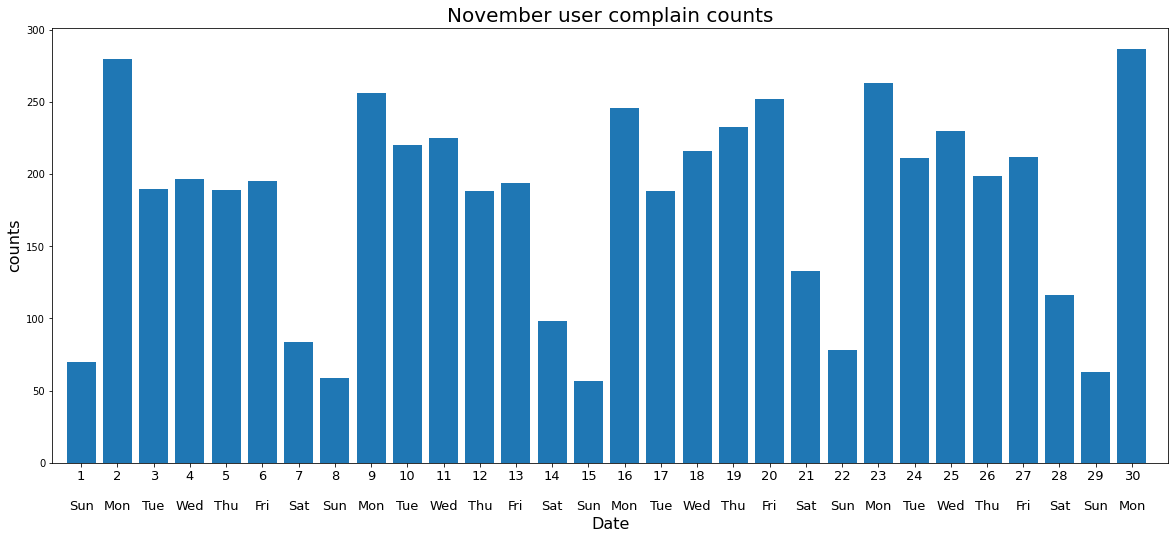

In [148]:
pbm_date = tr_pb.time.dt.date.value_counts().sort_index()
new_xticks =['\n\n'.join(v) for v in zip([str(x) for x in range(1,31)],pd.to_datetime(pbm_date.index).day_name().str[:3])]

plt.figure(figsize=(20,8))
plt.title("November user complain counts",size=20)
plt.bar(range(1,31),pbm_date.values)
plt.xlim(0.2,31)
plt.xticks(range(1,31),new_xticks,size=13)
plt.xlabel("Date",size=16)
plt.ylabel("counts",size=16)
plt.show()

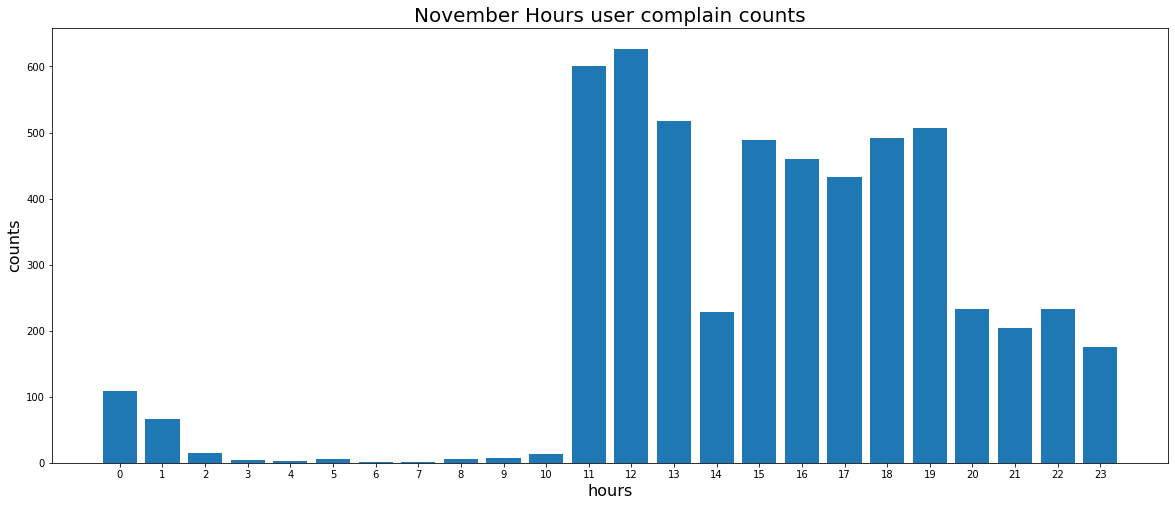

In [181]:
pbm_date = tr_pb.time.dt.hour.value_counts().sort_index()
# new_xticks =['\n\n'.join(v) for v in zip([str(x) for x in range(1,31)],pd.to_datetime(pbm_date.index).day_name().str[:3])]

plt.figure(figsize=(20,8))
plt.title("November Hours user complain counts",size=20)
plt.bar(range(24),pbm_date.values)
# plt.xlim(0.2,31)
plt.xticks(range(24),range(24))
plt.xlabel("hours",size=16)
plt.ylabel("counts",size=16)
plt.show()

11Ïãú Î∂ÄÌÑ∞ Í∏âÍ≤©ÌïòÍ≤å Ï¶ùÍ∞Ä, ÏÉàÎ≤ΩÍ∏∞Í∞ÑÏóêÎäî Î∂àÎßå ÌëúÏ∂ú ÌÅ¨Í≤å ÏóÜÏùå    
Ïã§Ï†ú ÏÇ¨Ïö©ÏûêÏùò Î∂àÎßå ÌëúÌòÑ ÏãúÍ∞ÑÏù¥Îùº Í∑∏Îü∞ÎìØ

In [ ]:
tr_pb.time.dt.hour.value_counts().sort_index()

In [162]:
tr_pb.loc[tr_pb.time.dt.date==pd.to_datetime("2020-11-01")]

user_id                time
193     16665 2020-11-01 19:00:00
407     13797 2020-11-01 19:00:00
501     13868 2020-11-01 12:00:00
586     22066 2020-11-01 14:00:00
748     10767 2020-11-01 13:00:00
...       ...                 ...
5199    22183 2020-11-01 13:00:00
5216    13120 2020-11-01 18:00:00
5226    21616 2020-11-01 23:00:00
5232    19130 2020-11-01 16:00:00
5361    18220 2020-11-01 13:00:00

[70 rows x 2 columns]

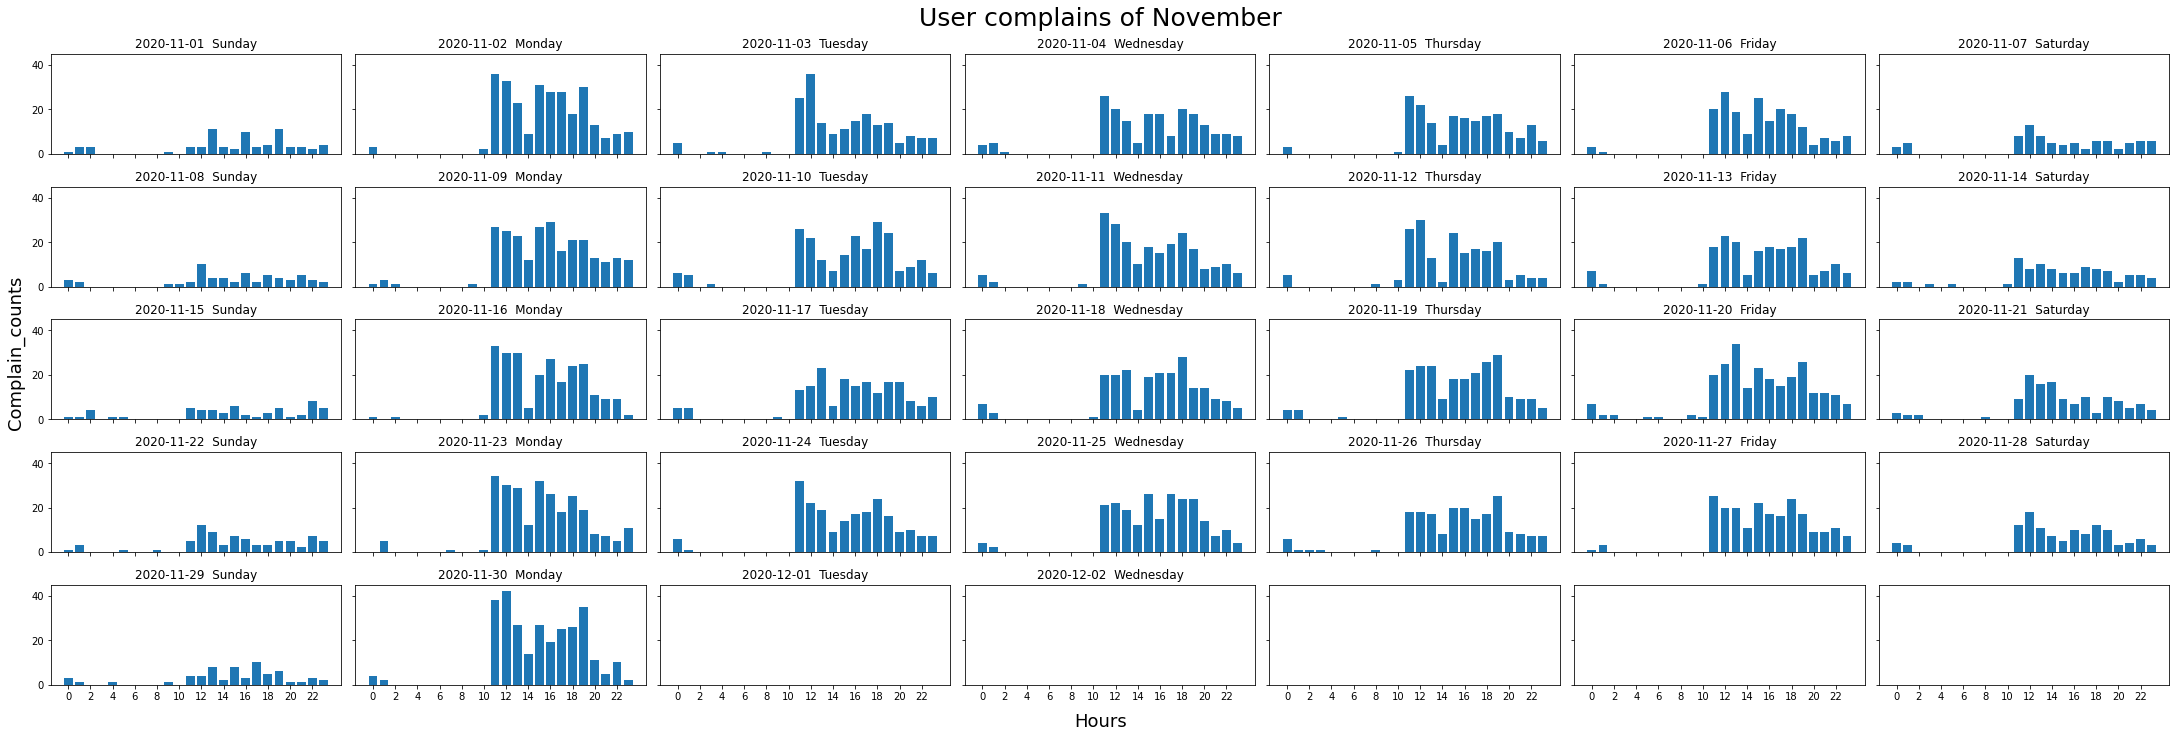

In [198]:
fig , axs = plt.subplots(nrows=5,ncols=7,figsize=(30,10), sharex=True, sharey=True)
plt.suptitle("User complains of November", size=25)

date = pd.to_datetime('2020-11-01')

for days in range(32):
    rows =days//7
    cols =days%7
    
    
    date_time = tr_pb.loc[tr_pb.time.dt.date==date]
    loc_df = date_time.time.dt.hour.value_counts().sort_index()
    
    dic_new = loc_df.to_dict()

    for v in range(0,24):
        if v not in dic_new.keys():
            dic_new[v] =0

    dic2={}
    for vv in range(24):
        dic2[vv] = dic_new[vv]

    df= pd.DataFrame(dic2.items())
    df.columns = ['time','counts']

    axs[rows,cols].bar(range(24),df.counts.values)  
    axs[rows,cols].set_title(str(date)[:-9]+"  "+date.day_name())
    axs[rows,cols].set_xticks(range(0,24,2))
    axs[rows,cols].set_ylim(0,45)
    date += datetime.timedelta(days=1)

fig.text(0.5, -0.02, 'Hours', ha='center',fontsize=18)
fig.text(-0.006, 0.5, 'Complain_counts', va='center', rotation='vertical',fontsize=18)
    
fig.tight_layout()

In [204]:
tr_q

time user_id       fwver quality_0 quality_1 quality_2  \
0       20201129090000   10000  05.15.2138       0.0         0       0.0   
1       20201129090000   10000  05.15.2138       0.0         0       0.0   
2       20201129090000   10000  05.15.2138       0.0         0       0.0   
3       20201129090000   10000  05.15.2138       0.0         0       0.0   
4       20201129090000   10000  05.15.2138       0.0         0       0.0   
...                ...     ...         ...       ...       ...       ...   
828619  20201124033000   24997  04.22.1778       0.0         0       0.0   
828620  20201124033000   24997  04.22.1778       0.0         0       0.0   
828621  20201124033000   24997  04.22.1778       0.0         0       0.0   
828622  20201124033000   24997  04.22.1778       0.0         0       0.0   
828623  20201124033000   24997  04.22.1778       0.0         0       0.0   

       quality_3 quality_4 quality_5 quality_6 quality_7 quality_8 quality_9  \
0              0         0         0         0         0         0         0   
1              0         0         0         0         0         0         0   
2              0         0         0         0         0         0         0   
3              0         0         0         0         0         0         0   
4              0         0         0         0         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
828619         0         0         1         0         0         0         0   
828620         0         0         0         0         0         0         0   
828621         0         0         3         0         0         0         0   
828622         0         0         0         0         0         0         0   
828623         0         0         9         0         0         0         0   

       quality_10 quality_11 quality_12  
0               4          0          0  
1               4          0          0  
2               4          0          0  
3               4          0          0  
4               4          0          0  
...           ...        ...        ...  
828619         17          0          0  
828620         17          0          0  
828621         17          0          0  
828622         17          0          0  
828623         17          0          0  

[828624 rows x 16 columns]

In [205]:
len(tr_q.user_id.unique())

8281

In [212]:
tr_q.loc[tr_q.user_id==11016]

Empty DataFrame
Columns: [time, user_id, fwver, quality_0, quality_1, quality_2, quality_3, quality_4, quality_5, quality_6, quality_7, quality_8, quality_9, quality_10, quality_11, quality_12]
Index: []

In [213]:
tr_err.loc[tr_err.user_id==11016]

user_id            time model_nm       fwver  errtype errcode
1041575    11016  20201101000029  model_0  04.22.1750       26       1
1041576    11016  20201101013300  model_0  04.22.1750       40       1
1041577    11016  20201101013301  model_0  04.22.1750       40       0
1041578    11016  20201101022959  model_0  04.22.1750       15       1
1041579    11016  20201101095118  model_0  04.22.1750       16       1
...          ...             ...      ...         ...      ...     ...
1042177    11016  20201130010955  model_0  04.22.1778       15       1
1042178    11016  20201130021453  model_0  04.22.1778       22       1
1042179    11016  20201130072407  model_0  04.22.1778       16       1
1042180    11016  20201130072407  model_0  04.22.1778       31       1
1042181    11016  20201130072427  model_0  04.22.1778       31       0

[607 rows x 6 columns]

In [214]:
tr_pb.loc[tr_pb.user_id==11016]

user_id                time
39      11016 2020-11-26 20:00:00
434     11016 2020-11-17 23:00:00
2318    11016 2020-11-23 18:00:00
3698    11016 2020-11-24 22:00:00

In [216]:
tr_q

time user_id       fwver quality_0 quality_1 quality_2  \
0       20201129090000   10000  05.15.2138       0.0         0       0.0   
1       20201129090000   10000  05.15.2138       0.0         0       0.0   
2       20201129090000   10000  05.15.2138       0.0         0       0.0   
3       20201129090000   10000  05.15.2138       0.0         0       0.0   
4       20201129090000   10000  05.15.2138       0.0         0       0.0   
...                ...     ...         ...       ...       ...       ...   
828619  20201124033000   24997  04.22.1778       0.0         0       0.0   
828620  20201124033000   24997  04.22.1778       0.0         0       0.0   
828621  20201124033000   24997  04.22.1778       0.0         0       0.0   
828622  20201124033000   24997  04.22.1778       0.0         0       0.0   
828623  20201124033000   24997  04.22.1778       0.0         0       0.0   

       quality_3 quality_4 quality_5 quality_6 quality_7 quality_8 quality_9  \
0              0         0         0         0         0         0         0   
1              0         0         0         0         0         0         0   
2              0         0         0         0         0         0         0   
3              0         0         0         0         0         0         0   
4              0         0         0         0         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
828619         0         0         1         0         0         0         0   
828620         0         0         0         0         0         0         0   
828621         0         0         3         0         0         0         0   
828622         0         0         0         0         0         0         0   
828623         0         0         9         0         0         0         0   

       quality_10 quality_11 quality_12  
0               4          0          0  
1               4          0          0  
2               4          0          0  
3               4          0          0  
4               4          0          0  
...           ...        ...        ...  
828619         17          0          0  
828620         17          0          0  
828621         17          0          0  
828622         17          0          0  
828623         17          0          0  

[828624 rows x 16 columns]

In [230]:
user_p = list(set(tr_pb.user_id) & set(tr_q.user_id))
user_np = list(set(tr_q.user_id) - set(tr_pb.user_id))

In [231]:
tr_q.loc[tr_q['user_id'].isin(user_p+user_np)]

time  user_id       fwver quality_0 quality_1 quality_2  \
0       20201129090000    10000  05.15.2138       0.0         0       0.0   
1       20201129090000    10000  05.15.2138       0.0         0       0.0   
2       20201129090000    10000  05.15.2138       0.0         0       0.0   
3       20201129090000    10000  05.15.2138       0.0         0       0.0   
4       20201129090000    10000  05.15.2138       0.0         0       0.0   
...                ...      ...         ...       ...       ...       ...   
828619  20201124033000    24997  04.22.1778       0.0         0       0.0   
828620  20201124033000    24997  04.22.1778       0.0         0       0.0   
828621  20201124033000    24997  04.22.1778       0.0         0       0.0   
828622  20201124033000    24997  04.22.1778       0.0         0       0.0   
828623  20201124033000    24997  04.22.1778       0.0         0       0.0   

       quality_3 quality_4 quality_5 quality_6 quality_7 quality_8 quality_9  \
0              0         0         0         0         0         0         0   
1              0         0         0         0         0         0         0   
2              0         0         0         0         0         0         0   
3              0         0         0         0         0         0         0   
4              0         0         0         0         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
828619         0         0         1         0         0         0         0   
828620         0         0         0         0         0         0         0   
828621         0         0         3         0         0         0         0   
828622         0         0         0         0         0         0         0   
828623         0         0         9         0         0         0         0   

       quality_10 quality_11 quality_12  
0               4          0          0  
1               4          0          0  
2               4          0          0  
3               4          0          0  
4               4          0          0  
...           ...        ...        ...  
828619         17          0          0  
828620         17          0          0  
828621         17          0          0  
828622         17          0          0  
828623         17          0          0  

[828624 rows x 16 columns]

In [233]:
len(user_p+user_np)

8281

In [ ]:
df.loc[df['channel'].isin(['sale','fullprice'])]

In [234]:
os.listdir(PATH)

['train_quality_data.csv',
 'train_problem_data.csv',
 'test_err_data.csv',
 'sample_submission.csv',
 'test_quality_data.csv',
 'train_err_data.csv']

In [239]:
ts_q = pd.read_csv(PATH+"test_quality_data.csv",dtype=object)

In [240]:
len(ts_q.user_id.astype('int').unique())

8268

In [241]:
ts_q

time user_id       fwver quality_0 quality_1 quality_2  \
0       20201128195000   30000  04.33.1261       0.0         0       0.0   
1       20201128195000   30000  04.33.1261       0.0         0       0.0   
2       20201128195000   30000  04.33.1261       0.0         0       0.0   
3       20201128195000   30000  04.33.1261       0.0         0       0.0   
4       20201128195000   30000  04.33.1261       0.0         0       0.0   
...                ...     ...         ...       ...       ...       ...   
747967  20201125180000   44997  04.22.1750       0.0         0       0.0   
747968  20201125180000   44997  04.22.1750       0.0         0       0.0   
747969  20201125180000   44997  04.22.1750       0.0         0       0.0   
747970  20201125180000   44997  04.22.1750       0.0         0       0.0   
747971  20201125180000   44997  04.22.1750       0.0         0       0.0   

       quality_3 quality_4 quality_5 quality_6 quality_7 quality_8 quality_9  \
0              0         0         0         0         5         0         0   
1              0         0         0         0         5         0         0   
2              0         0         0         0         5         0         0   
3              0         0         0         0         5         0         0   
4              0         0         0         0         5         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
747967         0         0         2         0         0         0         0   
747968         0         0         0         0         0         0         0   
747969         0         0         0         0         0         0         0   
747970         0         0         0         0         0         0         0   
747971         0         0         0         0         0         0         0   

       quality_10 quality_11 quality_12  
0               2          0          0  
1               2          0          0  
2               2          0          0  
3               2          0          0  
4               2          0          0  
...           ...        ...        ...  
747967          3          0          0  
747968          3          0          0  
747969          3          0          0  
747970          3          0          0  
747971          3          0          0  

[747972 rows x 16 columns]

In [242]:
len(tr_pb.user_id.unique())

5000

SyntaxError: invalid character in identifier (<ipython-input-243-cb4553bf3ad1>, line 1)